<a href="https://colab.research.google.com/github/takeshinishimura/Agricultural_Markets/blob/main/diffusion_of_microwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import math
import japanize_matplotlib
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("https://www.esri.cao.go.jp/jp/stat/shouhi/0403fukyuritsu.xls", header=2, skipfooter=2)

In [4]:
df = df.replace('\u3000\u3000', np.nan)
df = df.drop(0)
df["年"] = [math.floor(i) + 1925 if i > 30 else math.floor(i) + 1988 for i in df["調査項目"]]

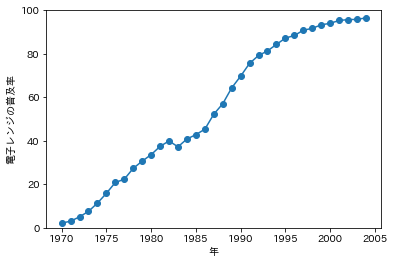

In [5]:
plt.plot(df["年"], df["電子レンジ"], marker="o", label="電子レンジ")
plt.ylim(0, 100)
plt.xlabel("年")
plt.ylabel("電子レンジの普及率")
plt.savefig("microwave.pdf", format="pdf", dpi=300)

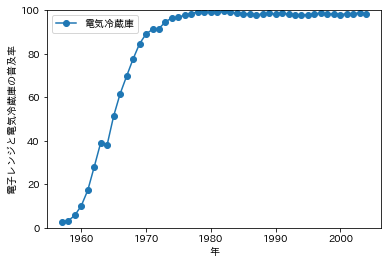

In [6]:
plt.plot(df["年"], df["電気冷蔵庫"], marker="o", label="電気冷蔵庫")
plt.ylim(0, 100)
plt.xlabel("年")
plt.ylabel("電子レンジと電気冷蔵庫の普及率")
plt.legend(reverse=True, loc='upper left')
plt.savefig("refrigerator.pdf", format="pdf", dpi=300)